# <span style='color:Gainsboro; font-size:45px'>Projeto de Estudo em Ciência de Dados</span>


## <span style='color:SteelBlue; font-size:25px'>Marketing Analytics - Análise e indicadores de Performance em redes de Varejo</span>

<span style='color:Gray; font-size:13px'>Desenvolvido por: **Alan Figueroa**</span>


In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Carregando Dataset
data = pd.read_csv('household_power_consumption.txt', sep=";",
                   low_memory=False)

In [3]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
data.shape

(2075259, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


#### Verificando valores ausentes e os tipos de variáveis

In [6]:
data.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
data.isin(['?']).sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3               0
dtype: int64

In [8]:
data.replace('?', np.nan, inplace=True)

In [10]:
data.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [11]:
colunas_to_ft = ['Global_active_power', 'Global_reactive_power',
           'Voltage', 'Global_intensity', 'Sub_metering_1',
           'Sub_metering_2']

In [12]:
data[colunas_to_ft] = data[colunas_to_ft].astype(float)

In [13]:
data.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

___

#### Tratando os valores ausentes

In [14]:
colunas = ['Global_active_power', 'Global_reactive_power',
           'Voltage', 'Global_intensity', 'Sub_metering_1',
           'Sub_metering_2','Sub_metering_3']

In [15]:
for col in colunas_to_ft:
    print(col)
    print("Mínimo ", data[col].min())
    print("Máximo ", data[col].max())
    print("Média ", data[col].mean())
    print("Mediana ", data[col].median())
    print("\n")

Global_active_power
Mínimo  0.076
Máximo  11.122
Média  1.091615036500693
Mediana  0.602


Global_reactive_power
Mínimo  0.0
Máximo  1.39
Média  0.12371447630385488
Mediana  0.1


Voltage
Mínimo  223.2
Máximo  254.15
Média  240.83985797447758
Mediana  241.01


Global_intensity
Mínimo  0.2
Máximo  48.4
Média  4.6277593105838
Mediana  2.6


Sub_metering_1
Mínimo  0.0
Máximo  88.0
Média  1.1219233096502186
Mediana  0.0


Sub_metering_2
Mínimo  0.0
Máximo  80.0
Média  1.2985199679887571
Mediana  0.0




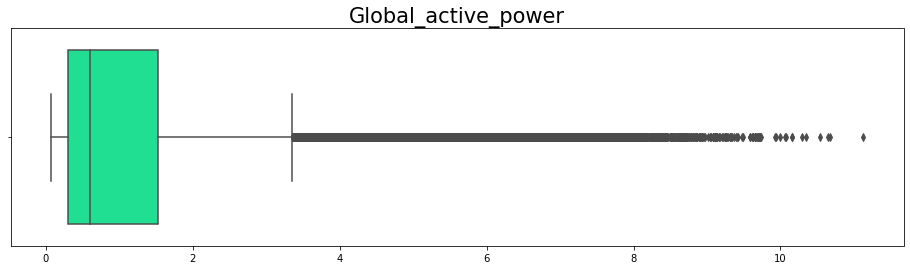

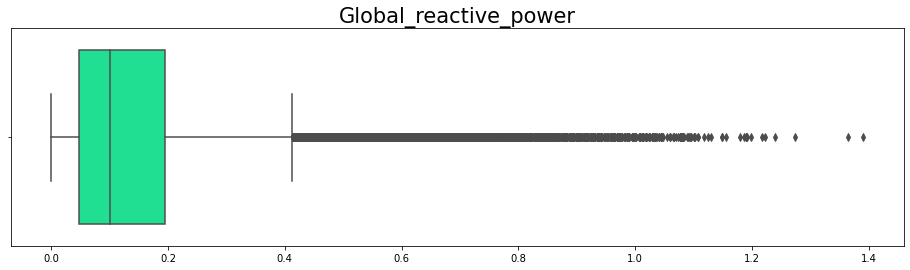

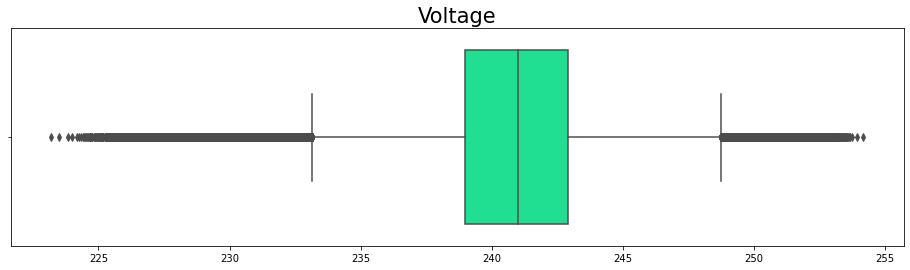

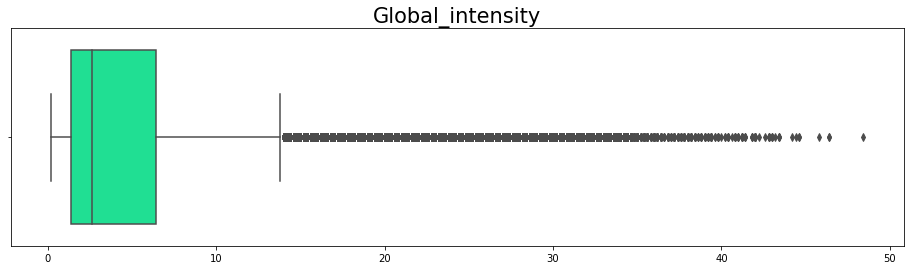

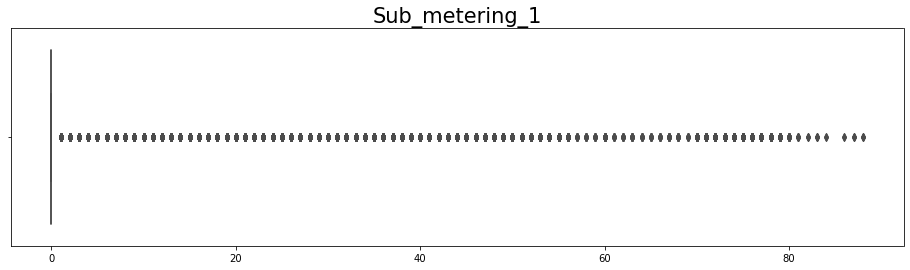

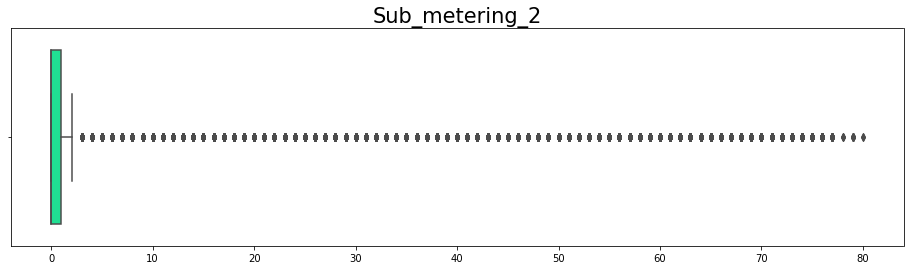

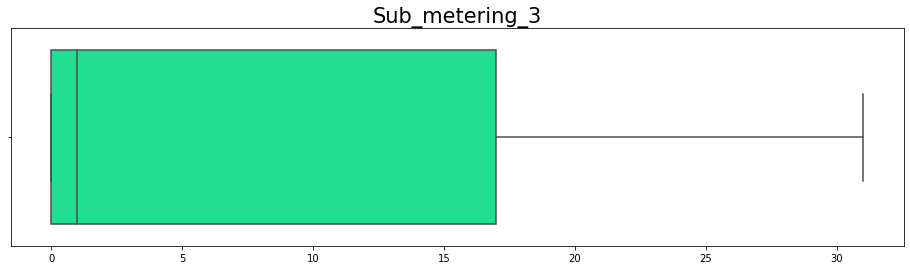

In [16]:
for col in colunas:
    plt.figure(figsize=(16,4))
    sns.boxplot(x=data[col], color='#00ff99')
    plt.xlabel(None)
    plt.title(col, size = 21)

In [17]:
# Preenchendo os valores NA:
for col in colunas:
    data[col] = data[col].fillna(data[col].median())

In [18]:
data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [19]:
# Salvando transformações (Backup)
data.to_csv('dataset_1.csv', index=False)

___

In [20]:
# Copiando dataset
data2 = data.copy()

In [21]:
# Transformando as variáveis objetos restantes em datetime:
data2['Date'] = pd.to_datetime(data2['Date'])
data2['Time'] = pd.to_datetime(data2['Time'])

In [23]:
# Extraindo informações da colunas de data:
data2['Ano'] = data2['Date'].dt.year
data2['Mes'] = data2['Date'].dt.month
data2['Dia'] = data2['Date'].dt.day
data2['Semana'] = data2['Date'].dt.isocalendar().week
data2['Hora'] = data2['Time'].dt.hour

In [24]:
# Organizando as colunas
data2 = data2[['Date','Ano','Mes','Semana','Dia','Hora','Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]

In [25]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Ano                    int64         
 2   Mes                    int64         
 3   Semana                 UInt32        
 4   Dia                    int64         
 5   Hora                   int64         
 6   Global_active_power    float64       
 7   Global_reactive_power  float64       
 8   Voltage                float64       
 9   Global_intensity       float64       
 10  Sub_metering_1         float64       
 11  Sub_metering_2         float64       
 12  Sub_metering_3         float64       
dtypes: UInt32(1), datetime64[ns](1), float64(7), int64(4)
memory usage: 199.9 MB


#### Separando dados para treinamento do modelo

In [235]:
X = data2.drop(columns=['Date','Mes','Ano','Semana','Dia','Hora'])

In [236]:
X.head(3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0


In [237]:
from sklearn.model_selection import train_test_split
X_amostra1, X_amostra2 = train_test_split(X, train_size=0.01)

#### Buscando número de clusters com Elbow Method

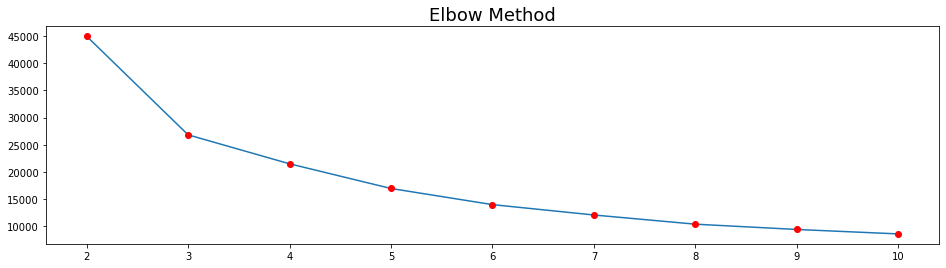

In [238]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

wcss_list = []
# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_amostra1)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criando e treinando o modelo
for k in range(2,11):
    modelo = KMeans(n_clusters=k)
    modelo.fit(X_pca)
    wcss_list.append(modelo.inertia_)

# Plot
plt.figure(figsize=(16,4))
plt.plot(range(2,11), wcss_list, marker="o", mfc='Red', mec='Red')
plt.title("Elbow Method", size=18)
plt.show()

#### Modelo de Clusterização

In [269]:
from sklearn.cluster import KMeans
modelo = KMeans(n_clusters=4)
modelo.fit(X_pca)

KMeans(n_clusters=4)

In [270]:
centros = modelo.cluster_centers_

In [271]:
centros

array([[ 1.08313324, -0.59713784],
       [ 4.55830984, -0.97517806],
       [-1.12027477,  0.23744084],
       [ 4.95612682,  3.12173875]])

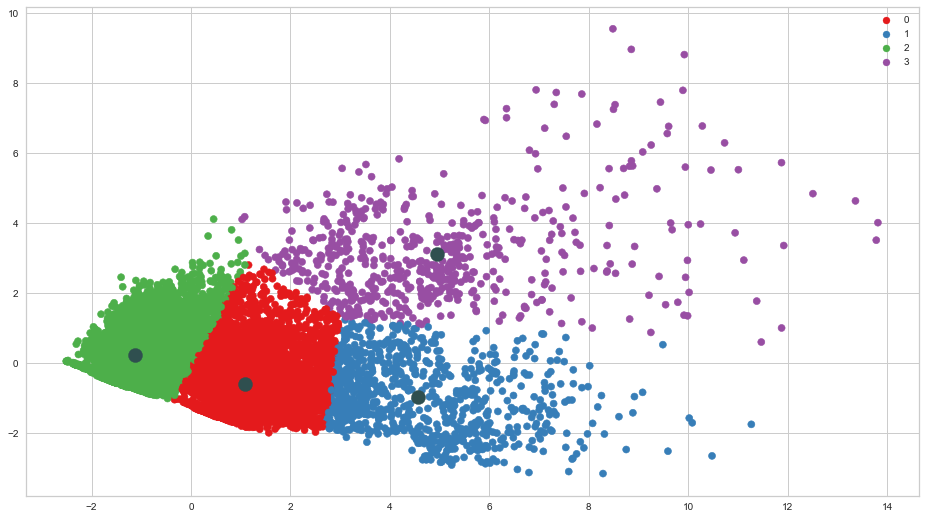

In [284]:
plt.figure(figsize=(16,9))
sns.scatterplot(x=X_pca[:,0],
                y=X_pca[:,1],
                hue=modelo.labels_,
                palette='Set1',
                edgecolor=None)
plt.scatter(x=centros[:,0], y=centros[:,1], s=200, color='DarkSlateGray')
plt.show()

#### Silhouette analysis

In [273]:
from sklearn.metrics import silhouette_score
silhouette_score(X_pca,
                 .labels_,
                 metric='euclidean')

0.5543565531584048

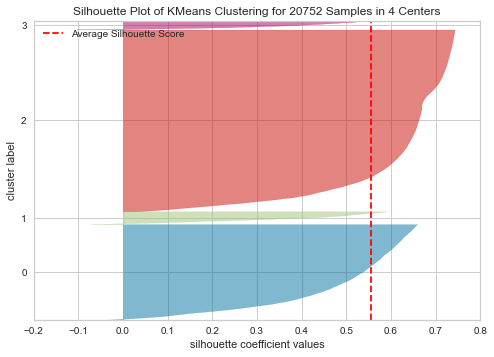

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 20752 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [283]:
from yellowbrick.cluster import SilhouetteVisualizer

viz = SilhouetteVisualizer(modelo, colors='yellowbrick')
viz.fit(X_pca)
viz.show()

In [274]:
clusters = pd.Series(modelo.labels_)

In [275]:
dataset_final = X_amostra1.reset_index(drop=True)

In [276]:
dataset_final['Cluster'] = clusters

In [277]:
dataset_final

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Cluster
0,2.486,0.170,232.12,10.6,0.0,36.0,1.0,3
1,0.602,0.100,241.01,2.6,0.0,0.0,1.0,2
2,0.436,0.206,242.09,2.0,0.0,0.0,0.0,2
3,0.244,0.092,242.31,1.0,0.0,0.0,0.0,2
4,1.354,0.058,244.74,5.4,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...
20747,0.262,0.072,239.59,1.2,0.0,0.0,0.0,2
20748,0.248,0.112,244.19,1.0,0.0,1.0,1.0,2
20749,2.326,0.080,240.62,9.6,0.0,0.0,18.0,0
20750,0.298,0.208,236.83,1.4,0.0,1.0,1.0,2


In [278]:
# Qual dos clusters encontrados consome mais energia

dataset_final.groupby(['Cluster'])['Global_active_power'].mean().to_frame()

,Global_active_power
Cluster,
0,1.737129
1,3.808466
2,0.430366
3,3.759445
